<a href="https://colab.research.google.com/github/NandyBa/NN/blob/master/EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Classification binaire simple

In [2]:
nb_sim=200

X=np.concatenate([np.linspace(0,10,nb_sim),
                  np.linspace(9,21,nb_sim)])
y=np.concatenate([np.repeat(0,nb_sim),
                  np.repeat(1,nb_sim)])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), y_train)


clf.score(X_test.reshape(-1, 1), y_test)

0.9696969696969697

In [6]:
predictions = clf.predict(X_test.reshape(-1, 1))

In [7]:
X_t = pd.DataFrame(X_test)
y_t = pd.DataFrame(y_test)

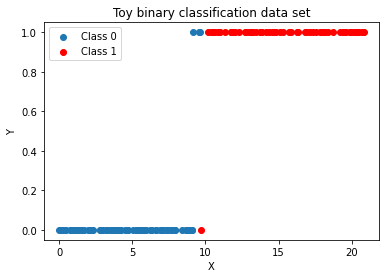

In [8]:
fig, ax = plt.subplots()
ax.scatter(X_t[predictions<=0.5], y_t[predictions<=0.5], label='Class 0')
ax.scatter(X_t[predictions>0.5], y_t[predictions>0.5], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

# Multi-layer Perceptron classifier

## Simple dataset

### Implementation avec scikit learn

In [9]:
nb_sim=200

X=np.concatenate([np.linspace(0,10,nb_sim),
                  np.linspace(9,21,nb_sim),
                  np.linspace(22,30,nb_sim)])
y=np.concatenate([np.repeat(0,nb_sim),
                  np.repeat(1,nb_sim),
                  np.repeat(0,nb_sim)])

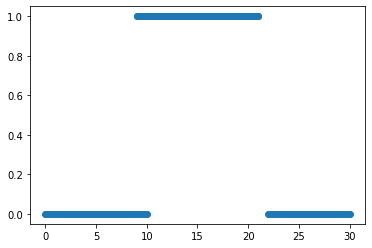

In [10]:
plt.scatter(X,y)

In [11]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train.reshape(-1, 1), y_train)

clf.score(X_test.reshape(-1, 1), y_test)

0.9733333333333334

In [12]:
predictions = clf.predict(X.reshape(-1, 1))

In [13]:
X_t = pd.DataFrame(X)
y_t = pd.DataFrame(y)

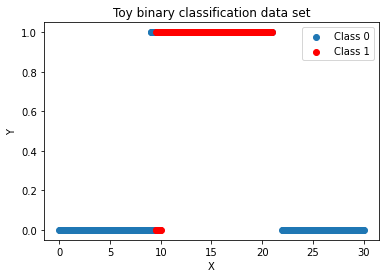

In [14]:
fig, ax = plt.subplots()
ax.scatter(X_t[predictions<=0.5], y_t[predictions<=0.5], label='Class 0')
ax.scatter(X_t[predictions>0.5], y_t[predictions>0.5], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

# Classification with bivariate dataset

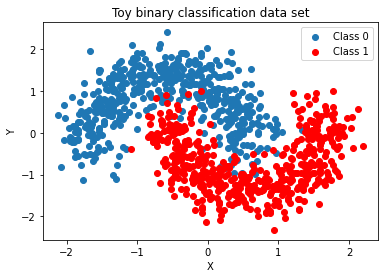

In [21]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

In [26]:
from sklearn.neural_network import MLPClassifier
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, Y_train)

clf.score(X_train, Y_train), clf.score(X_test, Y_test)

(0.972, 0.962)

léger overfitting

In [17]:
predictions = clf.predict(X)

In [18]:
X_t = pd.DataFrame(X)
y_t = pd.DataFrame(Y)

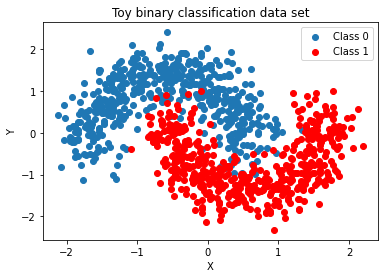

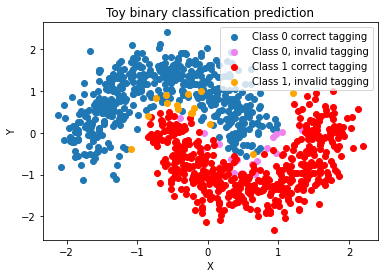

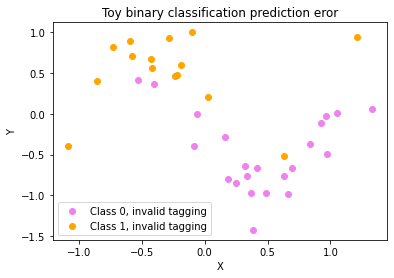

In [20]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

fig, ax = plt.subplots()
ax.scatter(X[(predictions<=0.5) & (Y==0), 0], X[(predictions<=0.5) & (Y==0), 1], label='Class 0 correct tagging')
ax.scatter(X[(predictions>0.5) & (Y==0), 0], X[(predictions>=0.5) & (Y==0), 1], color="violet", label='Class 0, invalid tagging')

ax.scatter(X[(predictions>0.5) & (Y==1), 0], X[(predictions>0.5) & (Y==1), 1], color="r", label='Class 1 correct tagging')
ax.scatter(X[(predictions<=0.5) & (Y==1), 0], X[(predictions<=0.5) & (Y==1), 1], color="orange", label='Class 1, invalid tagging')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification prediction');

fig, ax = plt.subplots()
ax.scatter(X[(predictions>0.5) & (Y==0), 0], X[(predictions>=0.5) & (Y==0), 1], color="violet", label='Class 0, invalid tagging')

ax.scatter(X[(predictions<=0.5) & (Y==1), 0], X[(predictions<=0.5) & (Y==1), 1], color="orange", label='Class 1, invalid tagging')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification prediction eror');